In [ ]:
#!pip install pillow pytesseract pandas
#!pip install pytesseract

In [28]:
import pytesseract
from PIL import Image
import pandas as pd


pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'


image_path = '38.jpg'
img = Image.open(image_path)

text = pytesseract.image_to_string(img, lang='deu')

print(text)

data = [{'Extracted Text': text}]

df = pd.DataFrame(data)

csv_path = 'extracted_text.csv'
df.to_csv(csv_path, index=False)

print(f"Text has been extracted and saved to CSV at {csv_path}")


E N E RG | EAU SWE | Ss für Nichtwohngebäude

‚gemäß den $S 16 ff. der Energieeinsparverordnung (EnEV) vom ' 21.11.2013

2 miciamume
Gang is: 03.06.2024 een Aushang
Gebäude

Hauptnutzung/

Gebäudekategorie ro,

Adresse 04107 Musterort, Musterstraße 1

Gebäudeteil Gebäudefoto
Baujahr Gebäude 1978 (freiwillig)
‚Nettogrundfläche 232 m?

Wesentliche Energieträger für | eragas H

Heizung und Warmwasser

Emeuerbare Energien

Art Verwendung:

Endenergieverbrauch

Warmwasser enthalten

; Endenergieverbrauch Wärme
7 [Pfichtangabe in Immobilienanzeigen]

1238  kWh/(m*a)

200 E 400 500 soo

A vergleichswert dieser Gebäul
1 für Heizung und Warmwasse

Endenergieverbraui

700 00 900 <1000

‚dekategorie
r

ıch Strom

[Pflichtangabe in Immobillenanzeigen] 3, 1
as KWn/m=)

10 20 0

A Vergleichswert dieser Gebäudekategorie

1 für Strom
'

Der Wert enthält den Stromverbrauch für

Zusatzheizung

Warmwasser Lüftung eingebaute Beleuchtung

Primärenergieverbrauch dieses Gebäudes

Aussteller

03.06.2014
Ausst

In [ ]:
#!pip install easyocr

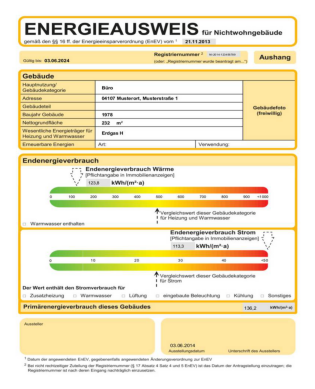

Detected text: ENERGIEAUSWEIS | Confidence: 1.00
Detected text: für Nichtwohngebäude | Confidence: 1.00
Detected text: gemäß | Confidence: 0.92
Detected text: SS 16 ff . der Energieeinsparverordnung (EnEV) vom | Confidence: 0.47
Detected text: 21.11.2013 | Confidence: 0.70
Detected text: Registriernummer | Confidence: 0.97
Detected text: 4Lna1246n9 | Confidence: 0.00
Detected text: Gultig bis: 03.06.2024 | Confidence: 0.69
Detected text: (oder-_Registriemummerwurde beantragt am | Confidence: 0.47
Detected text: Aushang | Confidence: 1.00
Detected text: Gebäude | Confidence: 0.90
Detected text: Hauptnutzung/ | Confidence: 0.61
Detected text: Büro | Confidence: 1.00
Detected text: Gebäudekategorie | Confidence: 1.00
Detected text: Adresse | Confidence: 1.00
Detected text: 04107 Musterort | Confidence: 0.96
Detected text: Musterstraße | Confidence: 1.00
Detected text: Gebäudeteil | Confidence: 0.99
Detected text: Gebaudefoto | Confidence: 0.92
Detected text: Baujahr Gebäude | Confidence: 

In [29]:
import easyocr
import matplotlib.pyplot as plt
from PIL import Image

img_path = '38.jpg'
img = Image.open(img_path)

reader = easyocr.Reader(['de'])  

results = reader.readtext(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

for (bbox, text, prob) in results:
    print(f"Detected text: {text} | Confidence: {prob:.2f}")


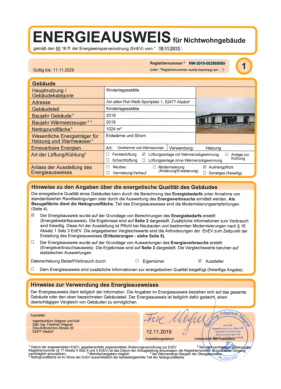

Detected text: ENERGIEAUSWEIS | Confidence: 1.00
Detected text: für Nichtwohngebäude | Confidence: 1.00
Detected text: gemäß den $S 16 ff. der Energieeinsparverordnung (EnEV) vom | Confidence: 0.76
Detected text: 18.11.2013 | Confidence: 0.39
Detected text: Registriernummer | Confidence: 1.00
Detected text: 2 | Confidence: 1.00
Detected text: NW-2019-002959559 | Confidence: 1.00
Detected text: Gültig bis: 11.11.2029 | Confidence: 0.65
Detected text: (oder: "Registriernummer wurde beantragt am .") | Confidence: 0.63
Detected text: Gebäude | Confidence: 1.00
Detected text: Hauptnutzung / | Confidence: 0.81
Detected text: Kindertagesstätte | Confidence: 1.00
Detected text: Gebäudekategorie | Confidence: 1.00
Detected text: Adresse | Confidence: 1.00
Detected text: Am alten Rot-Weiß-Sportplatz 1, 52477 Alsdorf | Confidence: 0.78
Detected text: Gebäudeteil | Confidence: 1.00
Detected text: Kindertagesstätte | Confidence: 0.83
Detected text: Baujahr Gebäude_ | Confidence: 0.72
Detected text:

In [3]:
import easyocr
import matplotlib.pyplot as plt
from PIL import Image

img_path = 'Energieausweis Nichtwohngebäude_Page_1.jpg'
img = Image.open(img_path)

reader = easyocr.Reader(['de'])  

results = reader.readtext(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

for (bbox, text, prob) in results:
    print(f"Detected text: {text} | Confidence: {prob:.2f}")


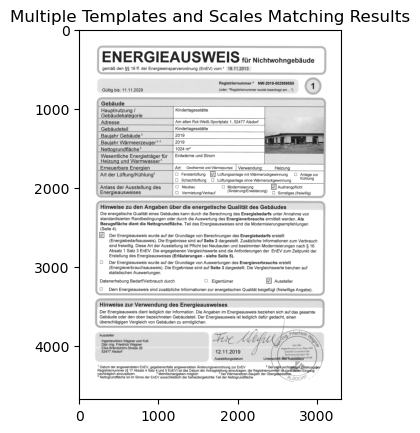

In [11]:
def multi_template_matching(image_path, template_paths, scales=[1], threshold=0.8):
    img = cv2.imread(image_path, 0) 
    if img is None:
        raise ValueError("Image failed to load. Ensure the path is correct.")
    detected_positions = []

    for template_path in template_paths:
        template = cv2.imread(template_path, 0)  
        if template is None:
            print(f"Warning: Template {template_path} could not be loaded and will be skipped.")
            continue
        
        for scale in scales:
            resized_template = cv2.resize(template, (0, 0), fx=scale, fy=scale)  
            w, h = resized_template.shape[::-1]

        
            res = cv2.matchTemplate(img, resized_template, cv2.TM_CCOEFF_NORMED)
            loc = np.where(res >= threshold)

        
            for pt in zip(*loc[::-1]):
                cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
                detected_positions.append((pt[0], pt[1], w, h))

    plt.imshow(img, cmap='gray')
    plt.title('Multiple Templates and Scales Matching Results')
    plt.show()

image_path = 'Energieausweis Nichtwohngebäude_Page_1.jpg'
template_paths = ['1.jpg', '2.jpg', '3.jpg'] 
scales = [0.8, 1, 1.2]  
locations = multi_template_matching(image_path, template_paths, scales)

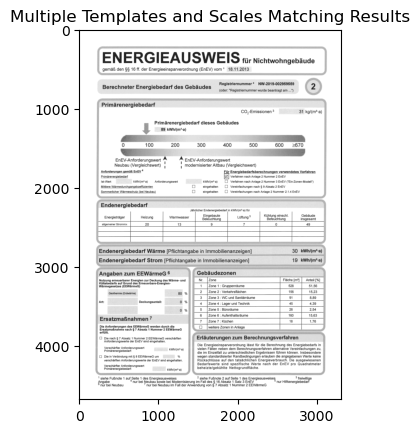

Verfahren nach Anlage 2 Nummer 2 EnEV
Verfahren nach Anlage 2 Nummer 2 EnEV
Verfahren nach Anlage 2 Nummer 2 EnEV
Verfahren nach Anlage 2 Nummer 2 EnEV


In [36]:
import cv2
import numpy as np
import easyocr
from matplotlib import pyplot as plt
from PIL import Image

def multi_template_matching(image_path, template_paths, scales=[1], threshold=0.8):
    img = cv2.imread(image_path, 0) 
    if img is None:
        raise ValueError("Image failed to load. Ensure the path is correct.")
    detected_positions = []

    for template_path in template_paths:
        template = cv2.imread(template_path, 0)  
        if template is None:
            print(f"Warning: Template {template_path} could not be loaded and will be skipped.")
            continue
        
        for scale in scales:
            resized_template = cv2.resize(template, (0, 0), fx=scale, fy=scale)  # Resize template
            w, h = resized_template.shape[::-1]

            
            res = cv2.matchTemplate(img, resized_template, cv2.TM_CCOEFF_NORMED)
            loc = np.where(res >= threshold)

          
            for pt in zip(*loc[::-1]):
                cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
                detected_positions.append((pt[0], pt[1], w, h))

    plt.imshow(img, cmap='gray')
    plt.title('Multiple Templates and Scales Matching Results')
    plt.show()

    return detected_positions

def extract_text_near_checkboxes(image_path, checkbox_positions, reader):
    img = Image.open(image_path)
    ocr_results = reader.readtext(image_path)
    
    texts_near_checkboxes = []
    for (bbox, text, prob) in ocr_results:
        for (cx, cy, cw, ch) in checkbox_positions:
            
            text_area_right = (cx + cw, cy, 150, ch) 
            
    
            if text_area_right[0] <= bbox[0][0] <= text_area_right[0] + text_area_right[2]:
            
                if text_area_right[1] <= bbox[0][1] <= text_area_right[1] + text_area_right[3]:
                    texts_near_checkboxes.append((text, prob, bbox))

    return texts_near_checkboxes

# Example usage
image_path = 'Energieausweis Nichtwohngebäude_Page_2.jpg'
template_paths = ['1.jpg', '2.jpg', '3.jpg']  
scales = [0.8, 1, 1.2]  
locations = multi_template_matching(image_path, template_paths, scales)


reader = easyocr.Reader(['de']) 

texts = extract_text_near_checkboxes(image_path, locations, reader)
text_final = []
for text in texts:
    text_final.append(text[0])
    print(text[0])

In [2]:
columns = {
    "Datum der angewendeten EnEV": "gemäß den §§ 16 ff. der Energieeinsparverordnung (EnEV) vom 1",
    "Registriernummer" : "Registriernummer 2 ",
    "Hauptnutzung/Gebäudekategorie" : 'Hauptnutzung /Gebäudekategorie',
    "Baujahr Gebäude" : "Baujahr Gebäude 3",
    "Baujahr Wärmeerzeuger" : "Baujahr Wärmeerzeuger 3, 4",
    "Nettogrundfläche" : "Nettogrundfläche 5",
    "Wesentliche Energieträger für Heizung und Warmwasser " : "Wesentliche Energieträger für Heizung und Warmwasser 3",
    "Erneuerbare Energien Art" : "Erneuerbare Energien",
    }

In [3]:
import pandas as pd 


df = pd.read_csv("final_extracted_data2.csv")

df.rename(columns=columns, inplace=True)
lst = list(df.columns)
#lst.extend(["1","2","3","4","5","3,"])
lst

['gemäß den §§ 16 ff. der Energieeinsparverordnung (EnEV) vom 1',
 'Registriernummer 2 ',
 'Hauptnutzung /Gebäudekategorie',
 'Adresse',
 'Gebäudeteil',
 'Baujahr Gebäude 3',
 'Baujahr Wärmeerzeuger 3, 4',
 'Nettogrundfläche 5',
 'Wesentliche Energieträger für Heizung und Warmwasser',
 'Erneuerbare Energien',
 'Verwendung',
 'CO2-Emissionen',
 'Primärenergiebedarf dieses Gebäudes kWh/(m²·a)',
 'Ist-Wert für Primärenergie kWh/(m²·a)',
 'Anforderungswert für Primärenergie kWh/(m²·a)',
 'Energieträger_Row1',
 'Heizung_Row1',
 'Warmwasser_Row1',
 'EingebauteBeleuchtung_Row1',
 'Lüftung_Row1',
 'KühlungMitBefeuchtung_Row1',
 'GebäudeInsgesamt_Row1',
 'Energieträger_Row2',
 'Heizung_Row2',
 'Warmwasser_Row2',
 'EingebauteBeleuchtung_Row2',
 'Lüftung_Row2',
 'KühlungMitBefeuchtung_Row2',
 'GebäudeInsgesamt_Row2',
 'Energieträger_Row3',
 'Heizung_Row3',
 'Warmwasser_Row3',
 'EingebauteBeleuchtung_Row3',
 'Lüftung_Row3',
 'KühlungMitBefeuchtung_Row3',
 'GebäudeInsgesamt_Row3',
 'Energieträger_R

In [4]:
lst_not_imp = ["ENERGIEAUSWEIS",
               "für Nichtwohngebäude",
              '(oder: "Registriernummer wurde beantragt am .")',
               "Gebäude",
               
               
              ]

In [7]:
lst

['gemäß den §§ 16 ff. der Energieeinsparverordnung (EnEV) vom 1',
 'Registriernummer 2 ',
 'Hauptnutzung /Gebäudekategorie',
 'Adresse',
 'Gebäudeteil',
 'Baujahr Gebäude 3',
 'Baujahr Wärmeerzeuger 3, 4',
 'Nettogrundfläche 5',
 'Wesentliche Energieträger für Heizung und Warmwasser',
 'Erneuerbare Energien',
 'Verwendung',
 'CO2-Emissionen',
 'Primärenergiebedarf dieses Gebäudes kWh/(m²·a)',
 'Ist-Wert für Primärenergie kWh/(m²·a)',
 'Anforderungswert für Primärenergie kWh/(m²·a)',
 'Energieträger_Row1',
 'Heizung_Row1',
 'Warmwasser_Row1',
 'EingebauteBeleuchtung_Row1',
 'Lüftung_Row1',
 'KühlungMitBefeuchtung_Row1',
 'GebäudeInsgesamt_Row1',
 'Energieträger_Row2',
 'Heizung_Row2',
 'Warmwasser_Row2',
 'EingebauteBeleuchtung_Row2',
 'Lüftung_Row2',
 'KühlungMitBefeuchtung_Row2',
 'GebäudeInsgesamt_Row2',
 'Energieträger_Row3',
 'Heizung_Row3',
 'Warmwasser_Row3',
 'EingebauteBeleuchtung_Row3',
 'Lüftung_Row3',
 'KühlungMitBefeuchtung_Row3',
 'GebäudeInsgesamt_Row3',
 'Energieträger_R

In [8]:
"Registriernummer" in 'Registriernummer 2 '

True

In [32]:
import easyocr
import matplotlib.pyplot as plt
from PIL import Image

img_path = 'Energieausweis Nichtwohngebäude_Page_1.jpg'
img = Image.open(img_path)

reader = easyocr.Reader(['de'])  

results = reader.readtext(img_path)
lst_text = []
for (bbox, text, prob) in results:
    lst_text.append(text) ############### Inja bayad prob ro check konam vali injuri baz mishe tuple ke nemikham
    
for main_text in lst_text:
    if round(prob,2) >= 0.60:
        for val in lst:
            if text in val:
                lst.remove(val)
                lst_text.remove(text)
                break
            
for value in lst_text:
    print(value)
    #print(f"Detected text: {text} | Confidence: {prob:.2f}")

ENERGIEAUSWEIS
für Nichtwohngebäude
18.11.2013
2
NW-2019-002959559
Gültig bis: 11.11.2029
Gebäude
Kindertagesstätte
Adresse
Am alten Rot-Weiß-Sportplatz 1, 52477 Alsdorf
Kindertagesstätte
Baujahr Gebäude_
3,
2019
Nettogrundfläche
1024 m?
Erdwärme und Strom
Heizung und Warmwasser
Art:
Verwendung:
Art der LüftunglKühlung?
Lüftungsanlage mit Wärmerückgewinnung
Schachtlüftung
Kühlung
Neubau
Aushangpflicht
Vermietung/Verkauf
Sonstiges (freiwillig)
Die energetische Qualität eines Gebäudes kann durch die Berechnung des Energiebedarfs unter Annahme von
Bezugsfläche dient die Nettogrundfläche. Teil des Energieausweises sind die Modernisierungsempfehlungen
Der Energieausweis wurde auf der Grundlage von Berechnungen des Energiebedarfs erstellt
sind freiwillig. Diese Art der Ausstellung ist Pflicht bei Neubauten und bestimmten Modernisierungen nach $ 16
EnEV zum Zeitpunkt der
siehe Seite 5).
(Energieverbrauchsausweis). Die Ergebnisse sind auf Seite 3 dargestellt: Die Vergleichswerte beruhen auf
Da

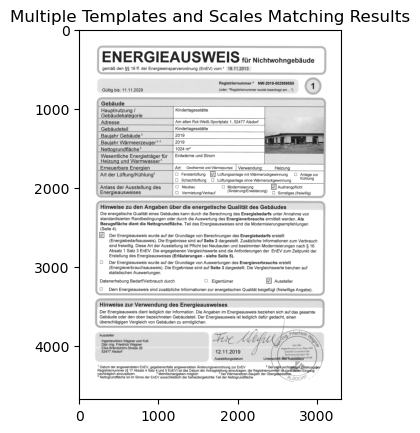

{'Lüftungsanlage mit Wärmerückgewinnung', '(Energiebedarfsausweis). Die Ergebnisse sind auf Seite 2 dargestellt. Zusätzliche Informationen zum Verbrauch', 'Aushangpflicht', 'Der Energieausweis wurde auf der Grundlage von Berechnungen des Energiebedarfs erstellt', 'Aussteller'}


In [7]:
import cv2
import numpy as np
import easyocr
from matplotlib import pyplot as plt
from PIL import Image

def multi_template_matching(image_path, template_paths, scales=[1], threshold=0.8):
    img = cv2.imread(image_path, 0) 
    if img is None:
        raise ValueError("Image failed to load. Ensure the path is correct.")
    detected_positions = []

    for template_path in template_paths:
        template = cv2.imread(template_path, 0)  
        if template is None:
            print(f"Warning: Template {template_path} could not be loaded and will be skipped.")
            continue
        
        for scale in scales:
            resized_template = cv2.resize(template, (0, 0), fx=scale, fy=scale)  # Resize template
            w, h = resized_template.shape[::-1]

            
            res = cv2.matchTemplate(img, resized_template, cv2.TM_CCOEFF_NORMED)
            loc = np.where(res >= threshold)

          
            for pt in zip(*loc[::-1]):
                cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
                detected_positions.append((pt[0], pt[1], w, h))

    plt.imshow(img, cmap='gray')
    plt.title('Multiple Templates and Scales Matching Results')
    plt.show()

    return detected_positions

def extract_text_near_checkboxes(image_path, checkbox_positions, reader):
    img = Image.open(image_path)
    ocr_results = reader.readtext(image_path)
    
    texts_near_checkboxes = []
    for (bbox, text, prob) in ocr_results:
        for (cx, cy, cw, ch) in checkbox_positions:
            
            text_area_right = (cx + cw, cy, 150, ch) 
            
    
            if text_area_right[0] <= bbox[0][0] <= text_area_right[0] + text_area_right[2]:
            
                if text_area_right[1] <= bbox[0][1] <= text_area_right[1] + text_area_right[3]:
                    texts_near_checkboxes.append((text, prob, bbox))

    return texts_near_checkboxes

# Example usage
image_path = 'Energieausweis Nichtwohngebäude_Page_1.jpg'
template_paths = ['1.jpg', '2.jpg', '3.jpg']  
scales = [0.8, 1, 1.2]  
locations = multi_template_matching(image_path, template_paths, scales)


reader = easyocr.Reader(['de']) 

texts = extract_text_near_checkboxes(image_path, locations, reader)
text_final = []
for text in texts:
    text_final.append(text[0])
    
s = set(text_final)
print(s)